# Sudoku

Os puzzles Sudoku são problemas de colocação de números inteiros entre 1 e $N^2$ numa matriz quadrada de dimensão $N^2$, por forma a que cada coluna e cada linha contenha todos os números, sem repetições. Além disso, cada matriz contém $N^2$ sub-matrizes quadradas disjuntas, de dimensão $N$, que deverão também elas conter os números entre  1 e $N^2$. 

Cada problema é dado por uma matriz parcialmente preenchida, cabendo ao jogador completá-la. 

O problema pode ser codificado através de um conjunto de $N^4$ constantes de tipo inteiro, correspondentes às posições da matriz, e escrevendo:

- $2 \times N^4$ desigualdades para os limites inferior e superior das constantes; 
- $N^2$ restrições do tipo “todos diferentes”, uma para cada linha da matriz; 
- $N^2$ restrições do tipo “todos diferentes”, uma para cada coluna da matriz; 
- $N^2$ restrições do tipo “todos diferentes”, uma para cada sub-matriz da matriz.

Acrescem ainda as restrições (igualdades) correspondentes à definição de um tabuleiro concreto.


Começamos por instalar o Z3.

In [ ]:
!pip install z3-solver

     |████████████████████████████████| 33.0 MB 17 kB/s 


In [ ]:
from z3 import *

Vamos necessitar de uma família de variáveis inteiras $x_{ij}$ e, para isso, vamos criar um dicionário do Python.
Complete o programa acrescentando ao solver as restrições impostas pelas regras do jogo.   

In [ ]:
N = 3

s = Solver()

x = {}

#------------------------------------------------------------------------------
#  Desigualdades para os limites inferior e superior das constantes
#------------------------------------------------------------------------------

for i in range(N*N):
    x[i] = {}
    for j in range(N*N):
        x[i][j] = Int('x'+str(i)+str(j))       # declaração de variáveis
        s.add(And(1<= x[i][j], x[i][j]<=9))    # restrições de valor

#------------------------------------------------------------------------------
# Restrições do tipo “todos diferentes”, uma para cada linha e coluna da matriz
#------------------------------------------------------------------------------

for i in x:
  for j in x:
    for z in range(N*N):
        if ( z != i ):
          s.add(x[i][j] != x[z][j])
          #print(x[i][j], " != ", x[z][j])
        if ( z != j ):
          s.add(x[i][j] != x[i][z])
          #print(x[i][j], " != ", x[i][z])

#------------------------------------------------------------------------------
# Restrições do tipo “todos diferentes”, uma para cada sub-matriz da matriz
#------------------------------------------------------------------------------

for a in range(N):
  for b in range(N):
    upLimitA = a*N + N       # limite superior linhas de uma submatriz
    downLimitA = a*N         # limite inferior linhas de uma submatriz
    upLimitB = b*N + N       # limite superior colunas de uma submatriz
    downLimitB = b*N         # limite inferior colunas de uma submatriz

    # x[i][j] representa cada membro de uma submatriz
    # x[i2][j2] representa todos os outros membros da mesma submatriz

    for i in x: 
      if ( i >= downLimitA and i < upLimitA):
       for j in x: 
         if ( j >= downLimitB and j < upLimitB):
          for i2 in x:
            if ( i2 >= downLimitA and i2 < upLimitA):
              for j2 in x:
                if ( j2 >= downLimitB and j2 < upLimitB):
                  if (not(i == i2 and j == j2)):
                    s.add(x[i][j] != x[i2][j2])
                    #print(x[i][j], " != ", x[i2][j2])



Acrescente as restrições correspondentes a um tabuleiro concreto e imprima no ecrã uma solução.

**Exemplo:**
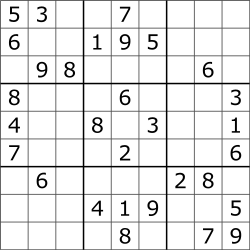
**Solução:** 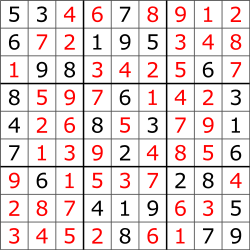

In [ ]:
s.push()
s.add(x[0][0] == 5, x[0][1] == 3, x[0][4] == 7)
s.add(x[1][0] == 6, x[1][3] == 1, x[1][4] == 9, x[1][5] == 5)
s.add(x[2][1] == 9, x[2][2] == 8, x[2][7] == 6)

s.add(x[3][0] == 8, x[3][4] == 6, x[3][8] == 3) 
s.add(x[4][0] == 4, x[4][3] == 8, x[4][5] == 3, x[4][8] == 1)
s.add(x[5][0] == 7, x[5][4] == 2, x[5][8] == 6)

s.add(x[6][1] == 6, x[6][6] == 2, x[6][7] == 8)
s.add(x[7][3] == 4, x[7][4] == 1, x[7][5] == 9, x[7][8] == 5)
s.add(x[8][4] == 8, x[8][7] == 7, x[8][8] == 9)



if s.check() == sat:
    m = s.model()
    print("Sat")
    r = [ [ m.evaluate(x[i][j]) for j in range(N*N) ]
          for i in range(N*N) ]
    print_matrix(r)
    
else:
    print("Unsat")

s.pop()